# Одномерная акустика

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Рассмотрим систему уравнений, которая описывает распространение плоских звуковых волн:

$$\frac{\partial u}{\partial t} + \frac{1}{\rho_0} \frac{\partial p}{\partial x} = 0,$$
$$\frac{\partial p}{\partial t} + {\rho_0 c_0^2} \frac{\partial u}{\partial x} = 0$$

Если проинтегрировать эту систему по области с границей $\Gamma$ И перейти к контурным интегралам, то пможно получить

$$ \oint_\Gamma \rho_0 u dx - pdt = 0,$$
$$ \oint_\Gamma \frac{p}{c_0^2}dx - \rho_0 u dt = 0.$$

Первое уравнение – закон сохранения импульса, второе – закон сохранения массы.

Если в иходной системе второе уравенение умножить на $\frac{1}{\rho_0 c_0}$, а потом сложить и вычесть из первого, получим _канонический_ вид системы:

$$\frac{\partial }{\partial t} \left ( u + \frac{p}{\rho_0 c_0}\right ) + c_0  \frac{\partial }{\partial x} \left ( u + \frac{p}{\rho_0 c_0}\right ) = 0,$$
$$\frac{\partial }{\partial t} \left ( u - \frac{p}{\rho_0 c_0}\right ) - c_0  \frac{\partial }{\partial x} \left ( u - \frac{p}{\rho_0 c_0}\right ) = 0$$

Система _расщепилась_ на два уравнеия переноса

$$ \frac{\partial Y}{\partial t} + c_0  \frac{\partial Y}{\partial x} = 0,$$
$$\frac{\partial Z}{\partial t} - c_0  \frac{\partial Z}{\partial x} = 0,$$

где $$Y = u + \frac{p}{\rho_0 c_0},  Z = u - \frac{p}{\rho_0 c_0}$$

Решения уравнений: $$Y = f(x - c_0t), Z = g(x + c_0t)$$



Величины $Y$ и $Z$ – инварианты Римана. $Y$ опостоянна вдоль прямых $x - c_0t = const$ (одно семейство характеристик), $Z$ постоянна вдоль прямых $x + c_0 t = const$ (второе семейство характеристик). Скорость распространения  – $c_0$.

Если вернуться к исходным переменым, получим

$$ u  = \frac{1}{2}[f(x - c_0t) + g(x+c_0t)],$$
$$ p  = \frac{\rho_0 c_0}{2}[f(x - c_0t) + g(x+c_0t)]$$

Если известны начальные условия $u(x,0) = u_0(x),\ p(x,0) = p_0(x)$, то функции $f$ и $g$ можно определить:

$$ u_0(x) = \frac{1}{2}[f(x) + g(x)],$$
$$ p_0(x)  = \frac{\rho_0 c_0}{2}[f(x ) + g(x)]$$

Отсюда 
$$f(x) = u_0(x) + \frac{p_0(x)}{\rho_0 c_0},\ g(x) = u_0(x) - \frac{p_0(x)}{\rho_0 c_0} $$

Окончательно, 

$$u(x,t) = \frac{u_0(x-c_0 t) + u_0(x+c_0t)}{2}  + \frac{p_0(x-c_0t) + p_0(x+c_0t)}{2\rho_0 c_0}$$
$$p(x,t) = \frac{p_0(x-c_0 t) + p_0(x+c_0t)}{2}  - \rho_0 c_0 \frac{u_0(x-c_0t) + u_0(x+c_0t)}{2} $$

## Задача о распаде произвольного разрыва

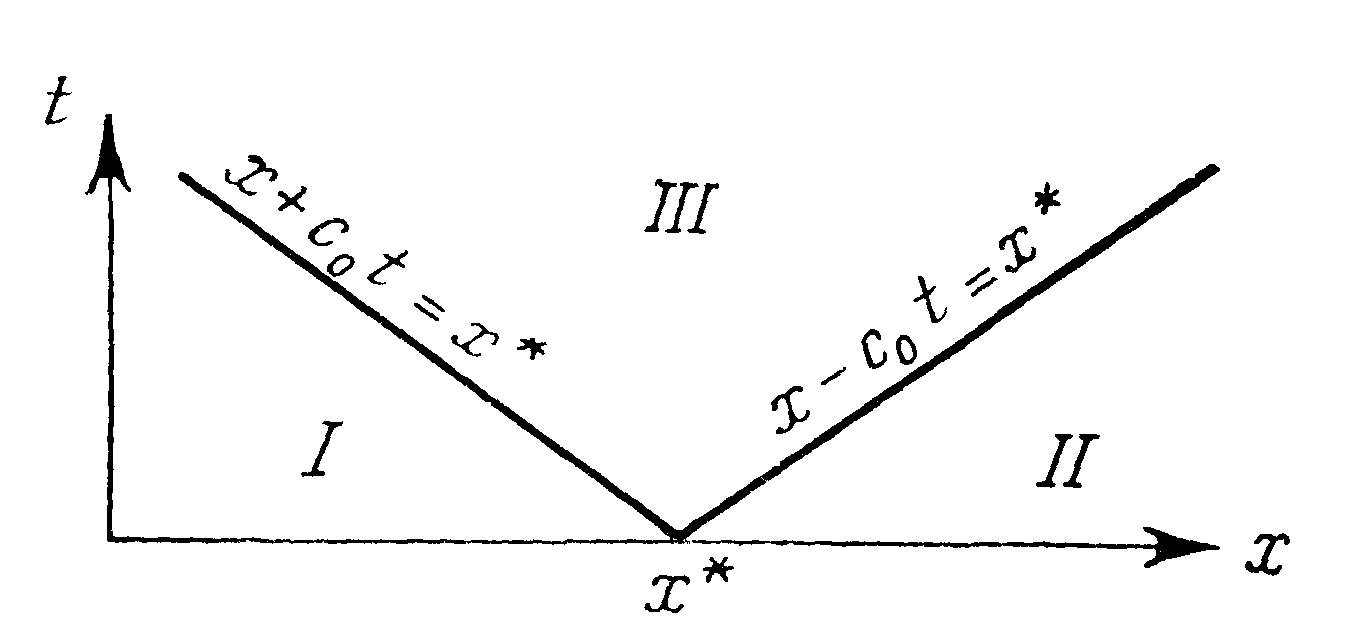

Пусть в момент времени $t=0$ начальные условтя ииеют вид:

$$ u_0(x) = u_I,\, p_0(x) = p_I \, при\ x < x^*,$$
$$ u_0(x) = u_{II},\, p_0(x) = p_{II} \, при\ x > x^*,$$

Учитывая полученные выше соотношения, получим следующее решение

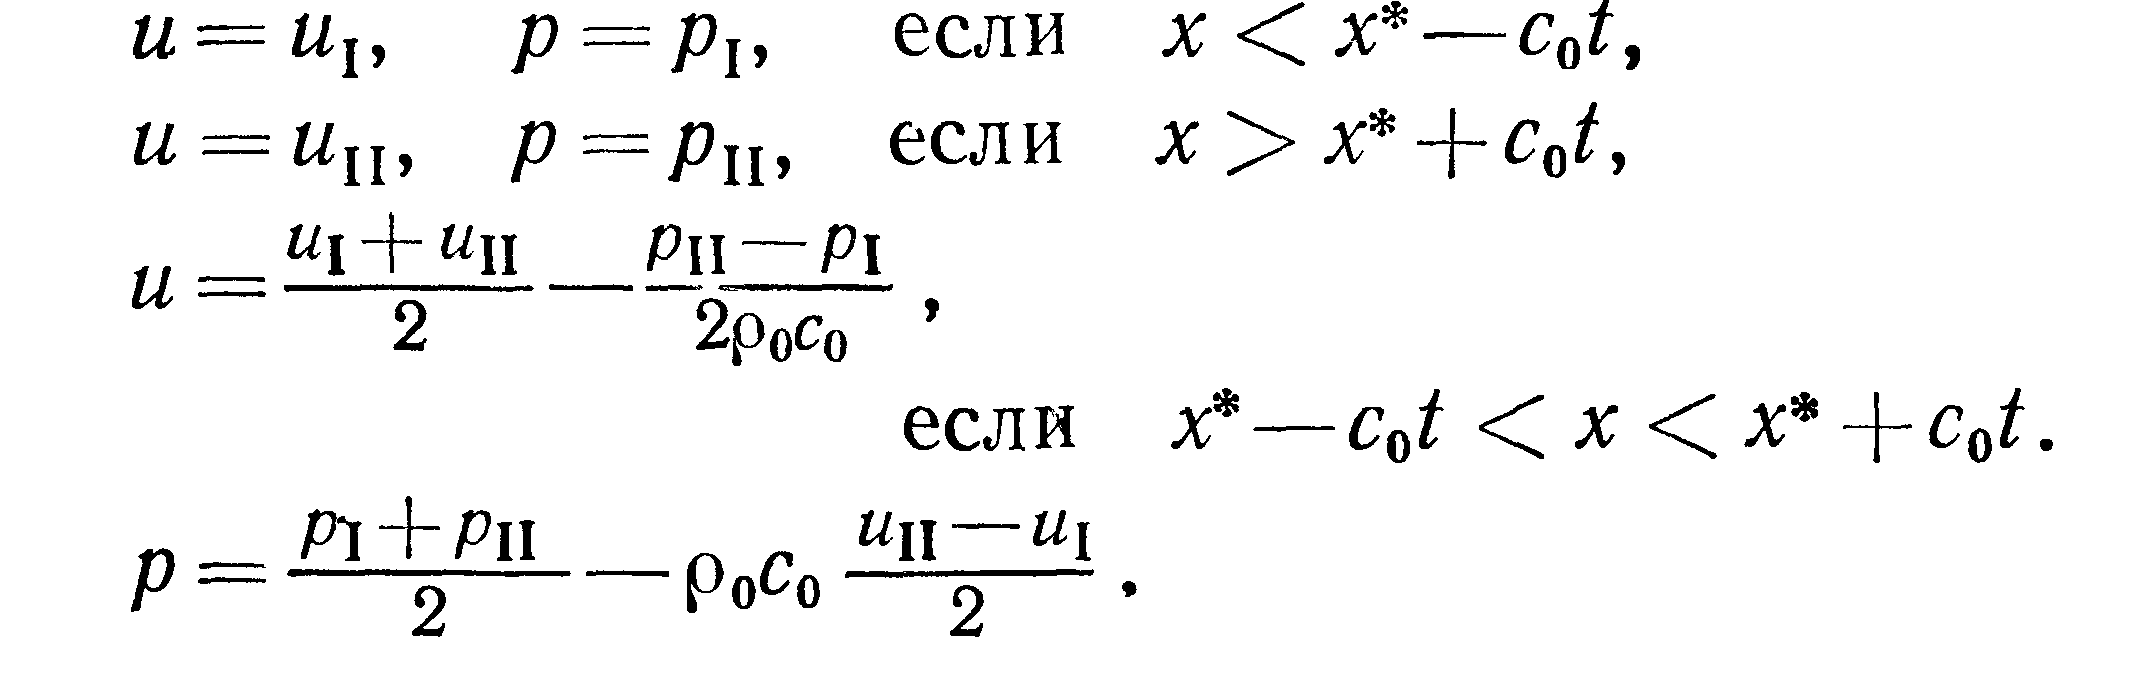

In [2]:
rho_0 = 0.25
c_0 = 2

h = 0.05
Cu = 1
dt = Cu * h / c_0

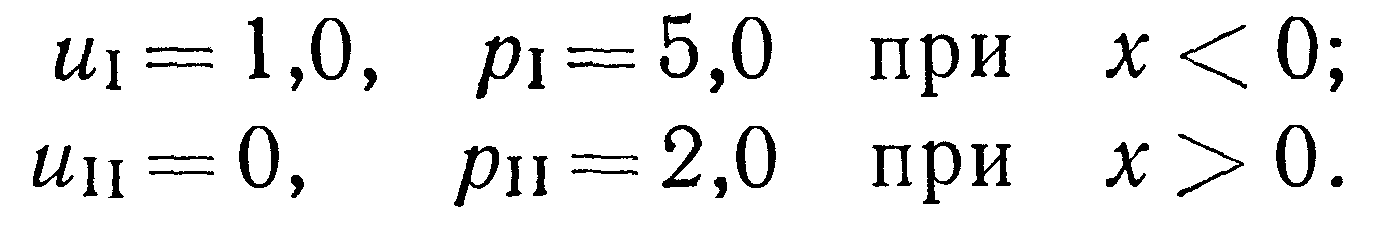

In [3]:
u_l, p_l = 1, 5 # x <= 0
u_r, p_r = 0, 2 # x > 0

In [4]:
x = np.arange(-2,2+h,h)

In [5]:
u = np.zeros_like(x)
p = np.zeros_like(x)

In [6]:
left = np.where(x<=0)
right = np.where(x>0)

In [7]:
left

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39], dtype=int64),)

In [8]:
u[left], p[left] = u_l, p_l
u[right], p[right] = u_r, p_r

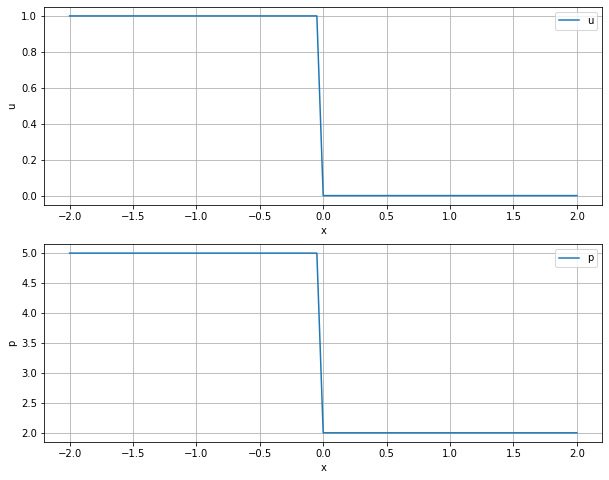

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].plot(x,u, label = 'u')
axs[1].plot(x,p, label = 'p')
axs[0].set_ylabel('u')
axs[1].set_ylabel('p')
for ax in axs:
    ax.set_xlabel('x')
    ax.legend()

    ax.grid(True)

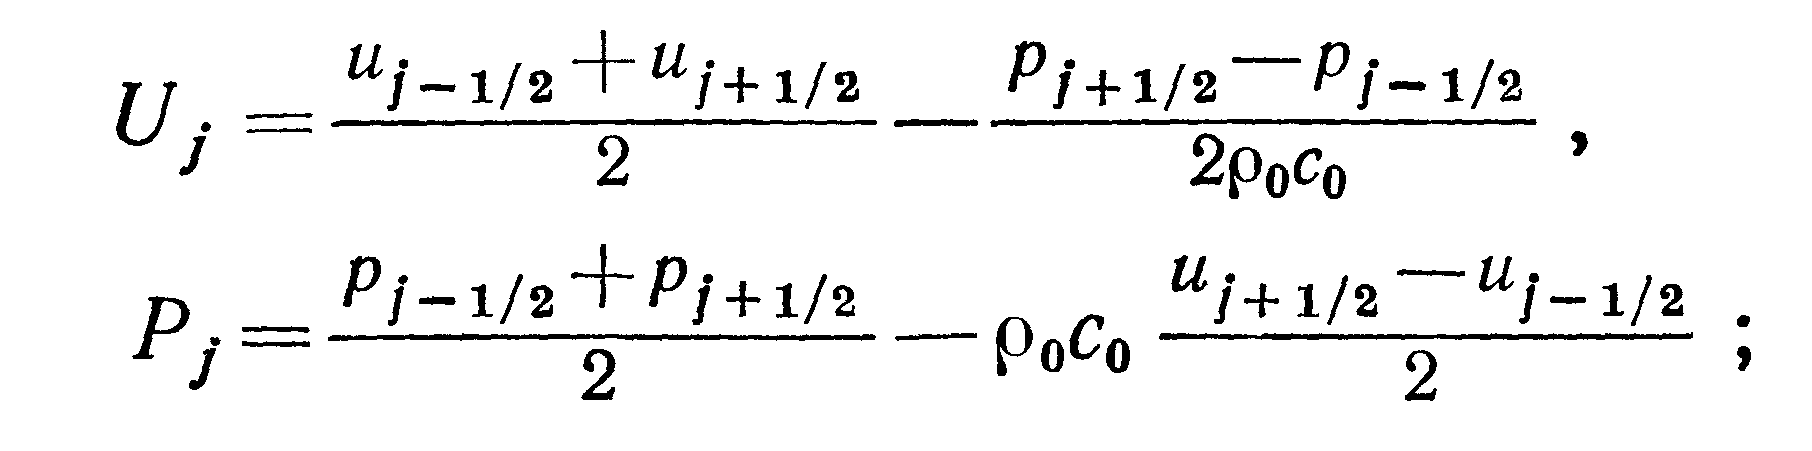

In [10]:
def get_BV(u_l,u_r,p_l,p_r):
    U = 0.5*(u_l + u_r) - 0.5*(p_r - p_l)/(rho_0*c_0)
    P = 0.5*(p_l + p_r) - 0.5*(u_r - u_l)*(rho_0*c_0)
    return U,P

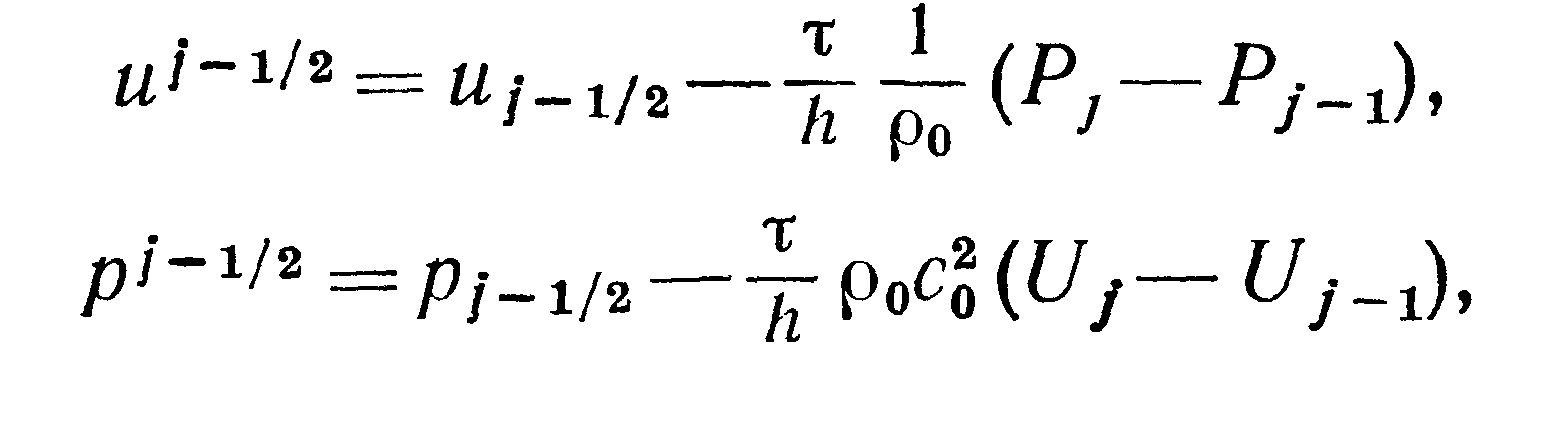

In [11]:
def godunov(u, p, nt, dt, dx, rho_0, c_0):
    u_n = np.zeros((nt,len(u)))
    p_n = np.zeros((nt,len(p)))
    
    u_n[0,:] = u.copy()
    p_n[0,:] = p.copy()
    
    for t in range(1,nt):
        U,P = get_BV(u[:-1],u[1:],p[:-1],p[1:])
        
        u_n[t,1:-1] = u[1:-1] - dt/dx*(P[1:]-P[:-1])/rho_0
        
        p_n[t,1:-1] = p[1:-1] - dt/dx*rho_0*c_0**2*(U[1:]-U[:-1])
        
        u_n[t,0] = u[0]
        p_n[t,0] = p[0]
        
        u_n[t,-1] = u[-1]
        p_n[t,-1] = p[-1]
        
        u = u_n[t].copy()
        p = p_n[t].copy()

    return u_n,p_n                 

In [12]:
nt = 25

In [13]:
Cu = 0.8

dt = Cu * h / c_0
u_n, p_n = godunov(u, p, nt, dt, h, rho_0, c_0)

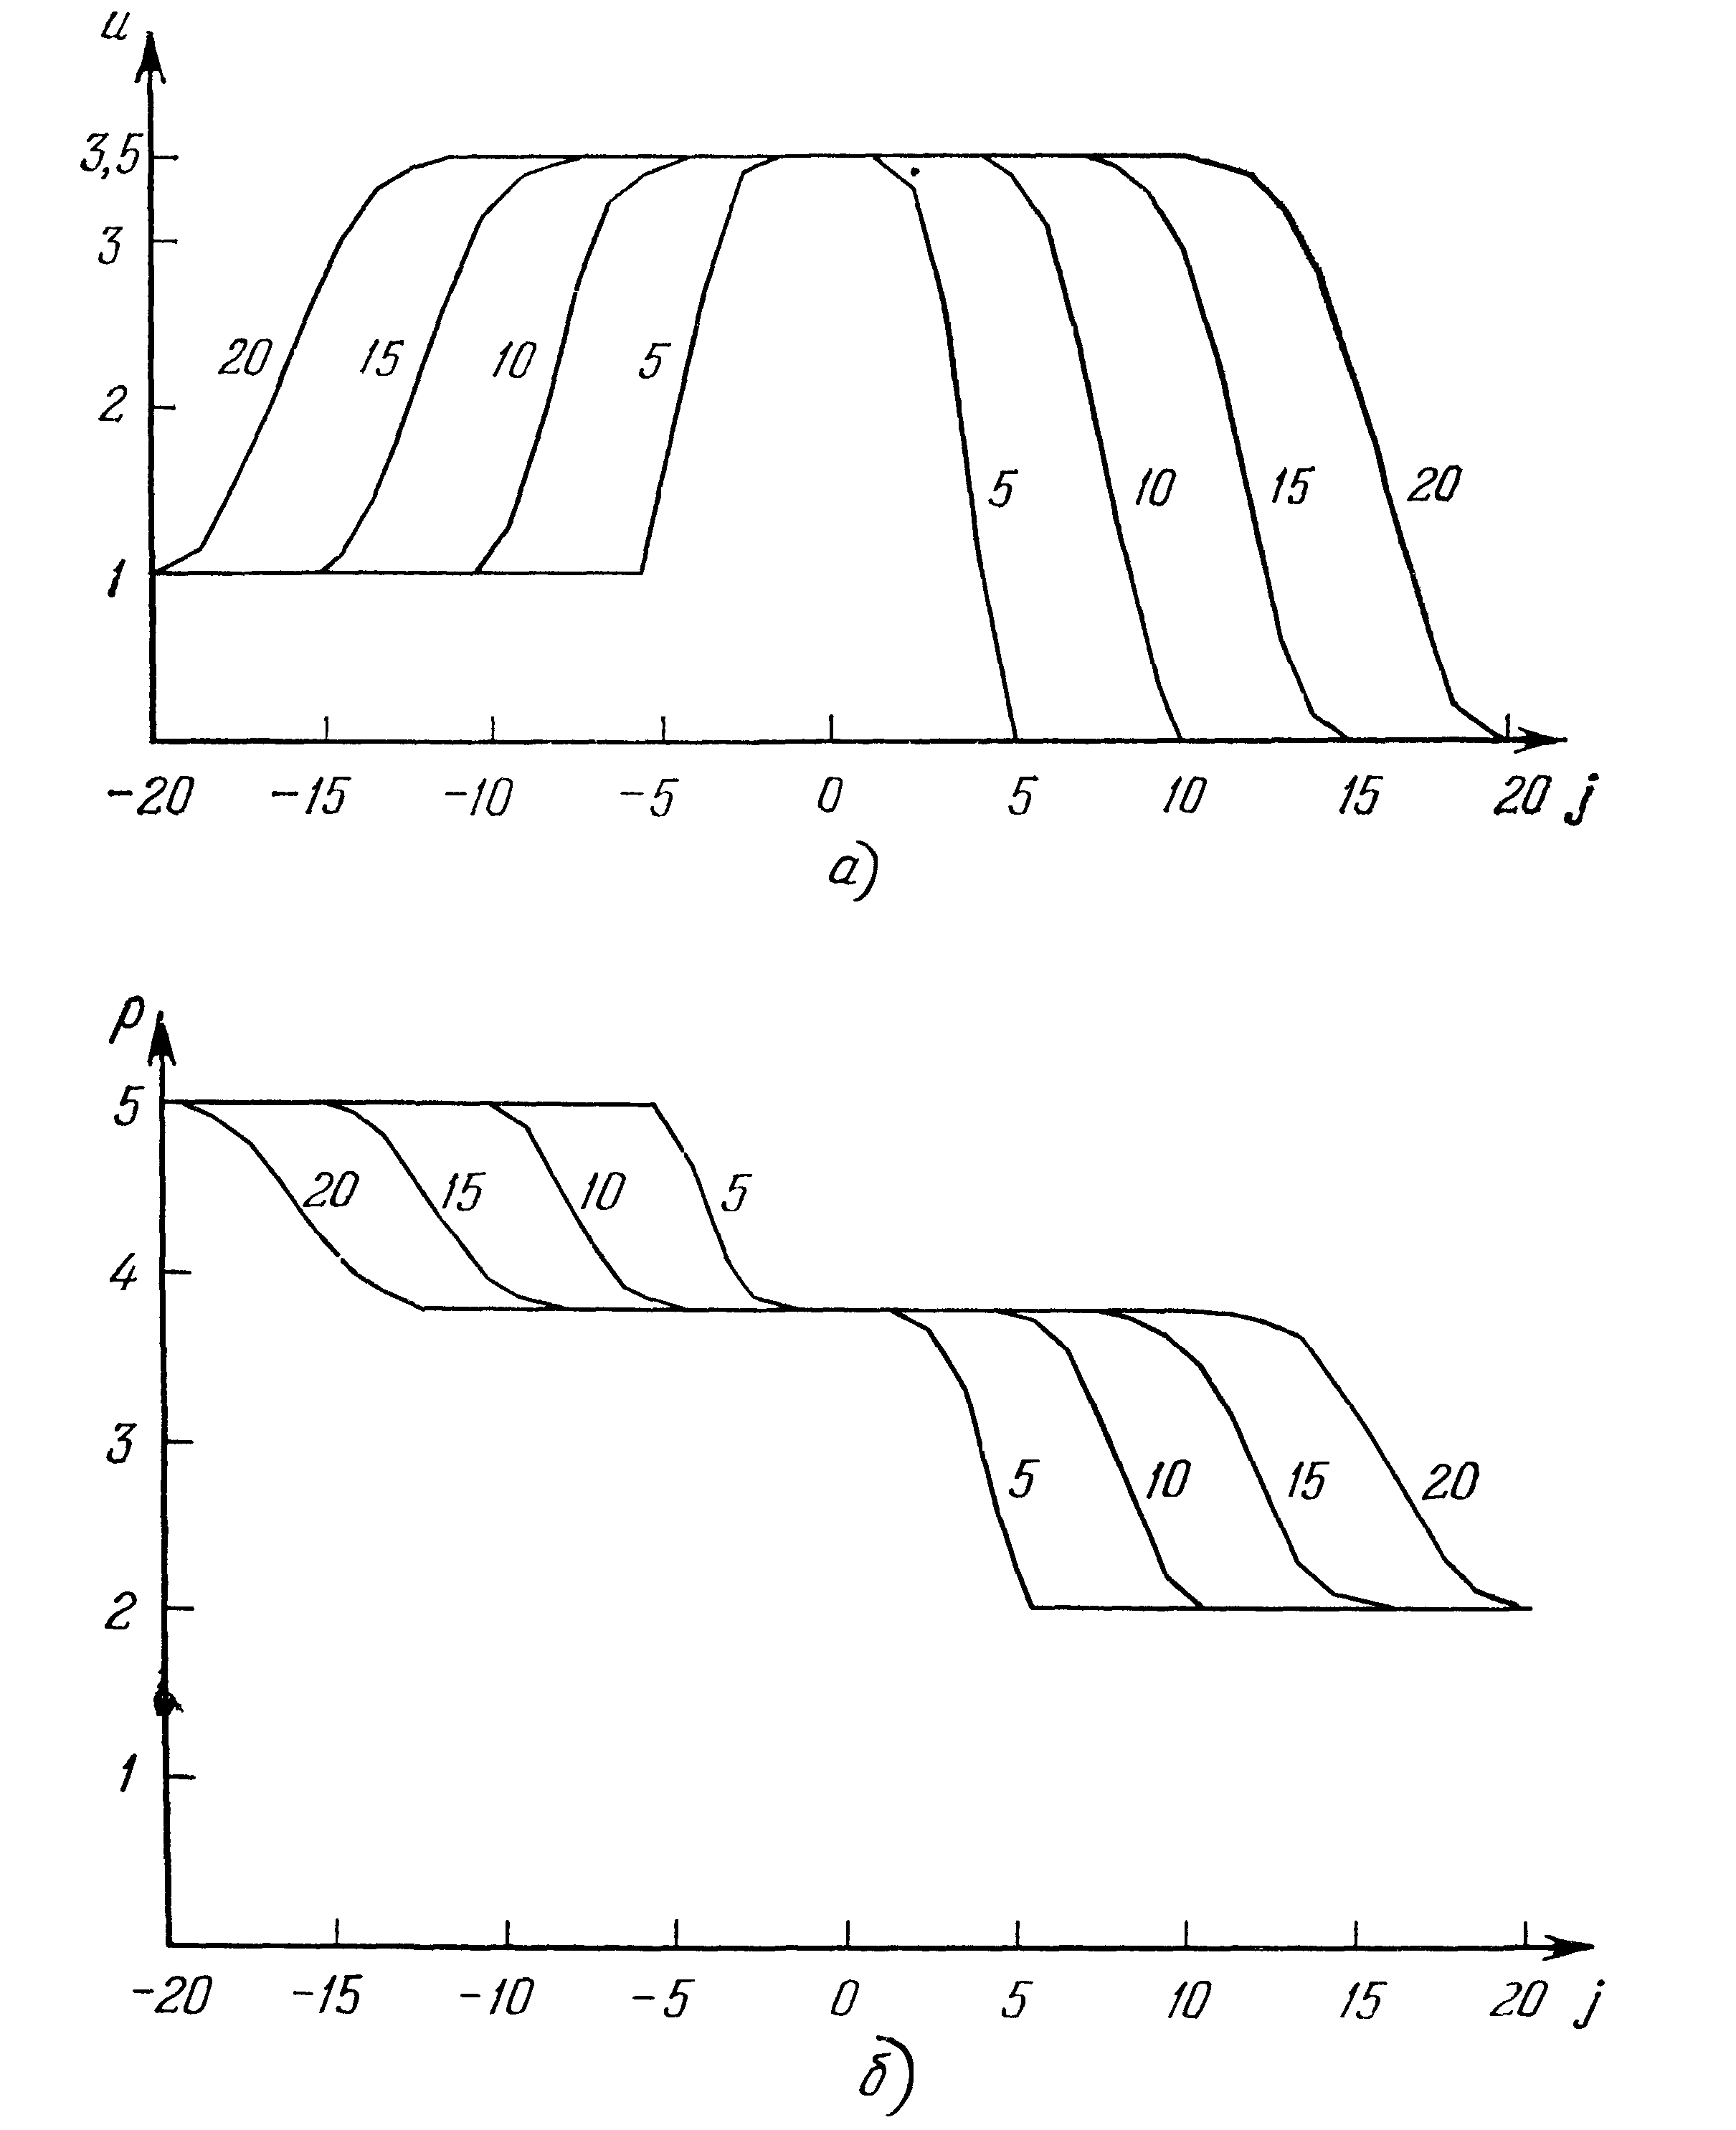

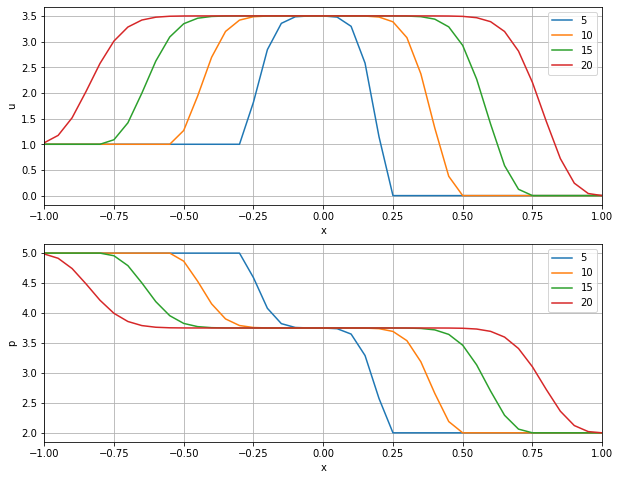

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
for step in (5,10,15,20):
    axs[0].plot(x,u_n[step],'-', label = step)
    axs[1].plot(x,p_n[step],'-', label = step)
axs[0].set_ylabel('u')
axs[1].set_ylabel('p')
for ax in axs:
    ax.set_xlim(-1,1)
    ax.set_xlabel('x')
    ax.legend()

    ax.grid(True)

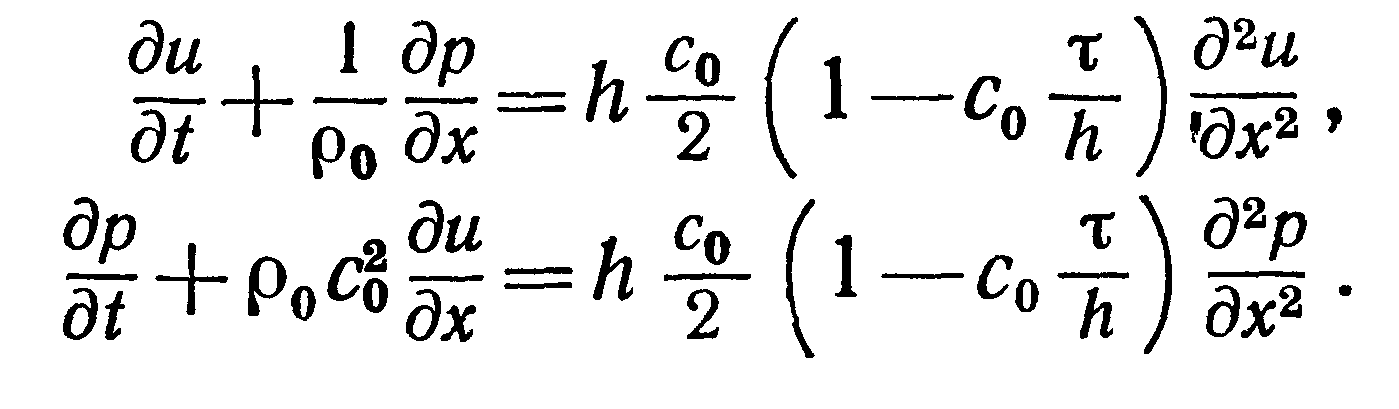

# А теперь с матрицами!

$$\frac{\partial u}{\partial t} + \frac{1}{\rho_0} \frac{\partial p}{\partial x} = 0,$$
$$\frac{\partial p}{\partial t} + {\rho_0 c_0^2} \frac{\partial u}{\partial x} = 0$$

In [15]:
U = np.array([u,p])

$$
A = 
\begin{matrix}
0 & \frac{1}{\rho_0} \\
\rho_0 c_0^2 & 0 \\
\end{matrix}
$$

$$
\Lambda = 
\begin{matrix}
c_0 & 0 \\
0 & -c_0 \\
\end{matrix}
$$

$$
\Lambda^+ = 
\begin{matrix}
c_0 & 0 \\
0 & 0 \\
\end{matrix}
$$


$$
\Lambda^- = 
\begin{matrix}
0 & 0 \\
0 & -c_0 \\
\end{matrix}
$$

$$
A = 
\begin{matrix}
0 & \frac{1}{\rho_0} \\
\rho_0 c_0^2 & 0 \\
\end{matrix}
$$

$$
K = 
\begin{matrix}
1 & -1 \\
\rho_0c_0 & \rho_0c_0 \\
\end{matrix}
$$


$$
K^{-1} = \frac{1}{2\rho_0c_0^2}
\begin{matrix}
\rho_0c_0^2 & c_0 \\
-\rho_0c_0^2 & c_0 \\
\end{matrix}
$$

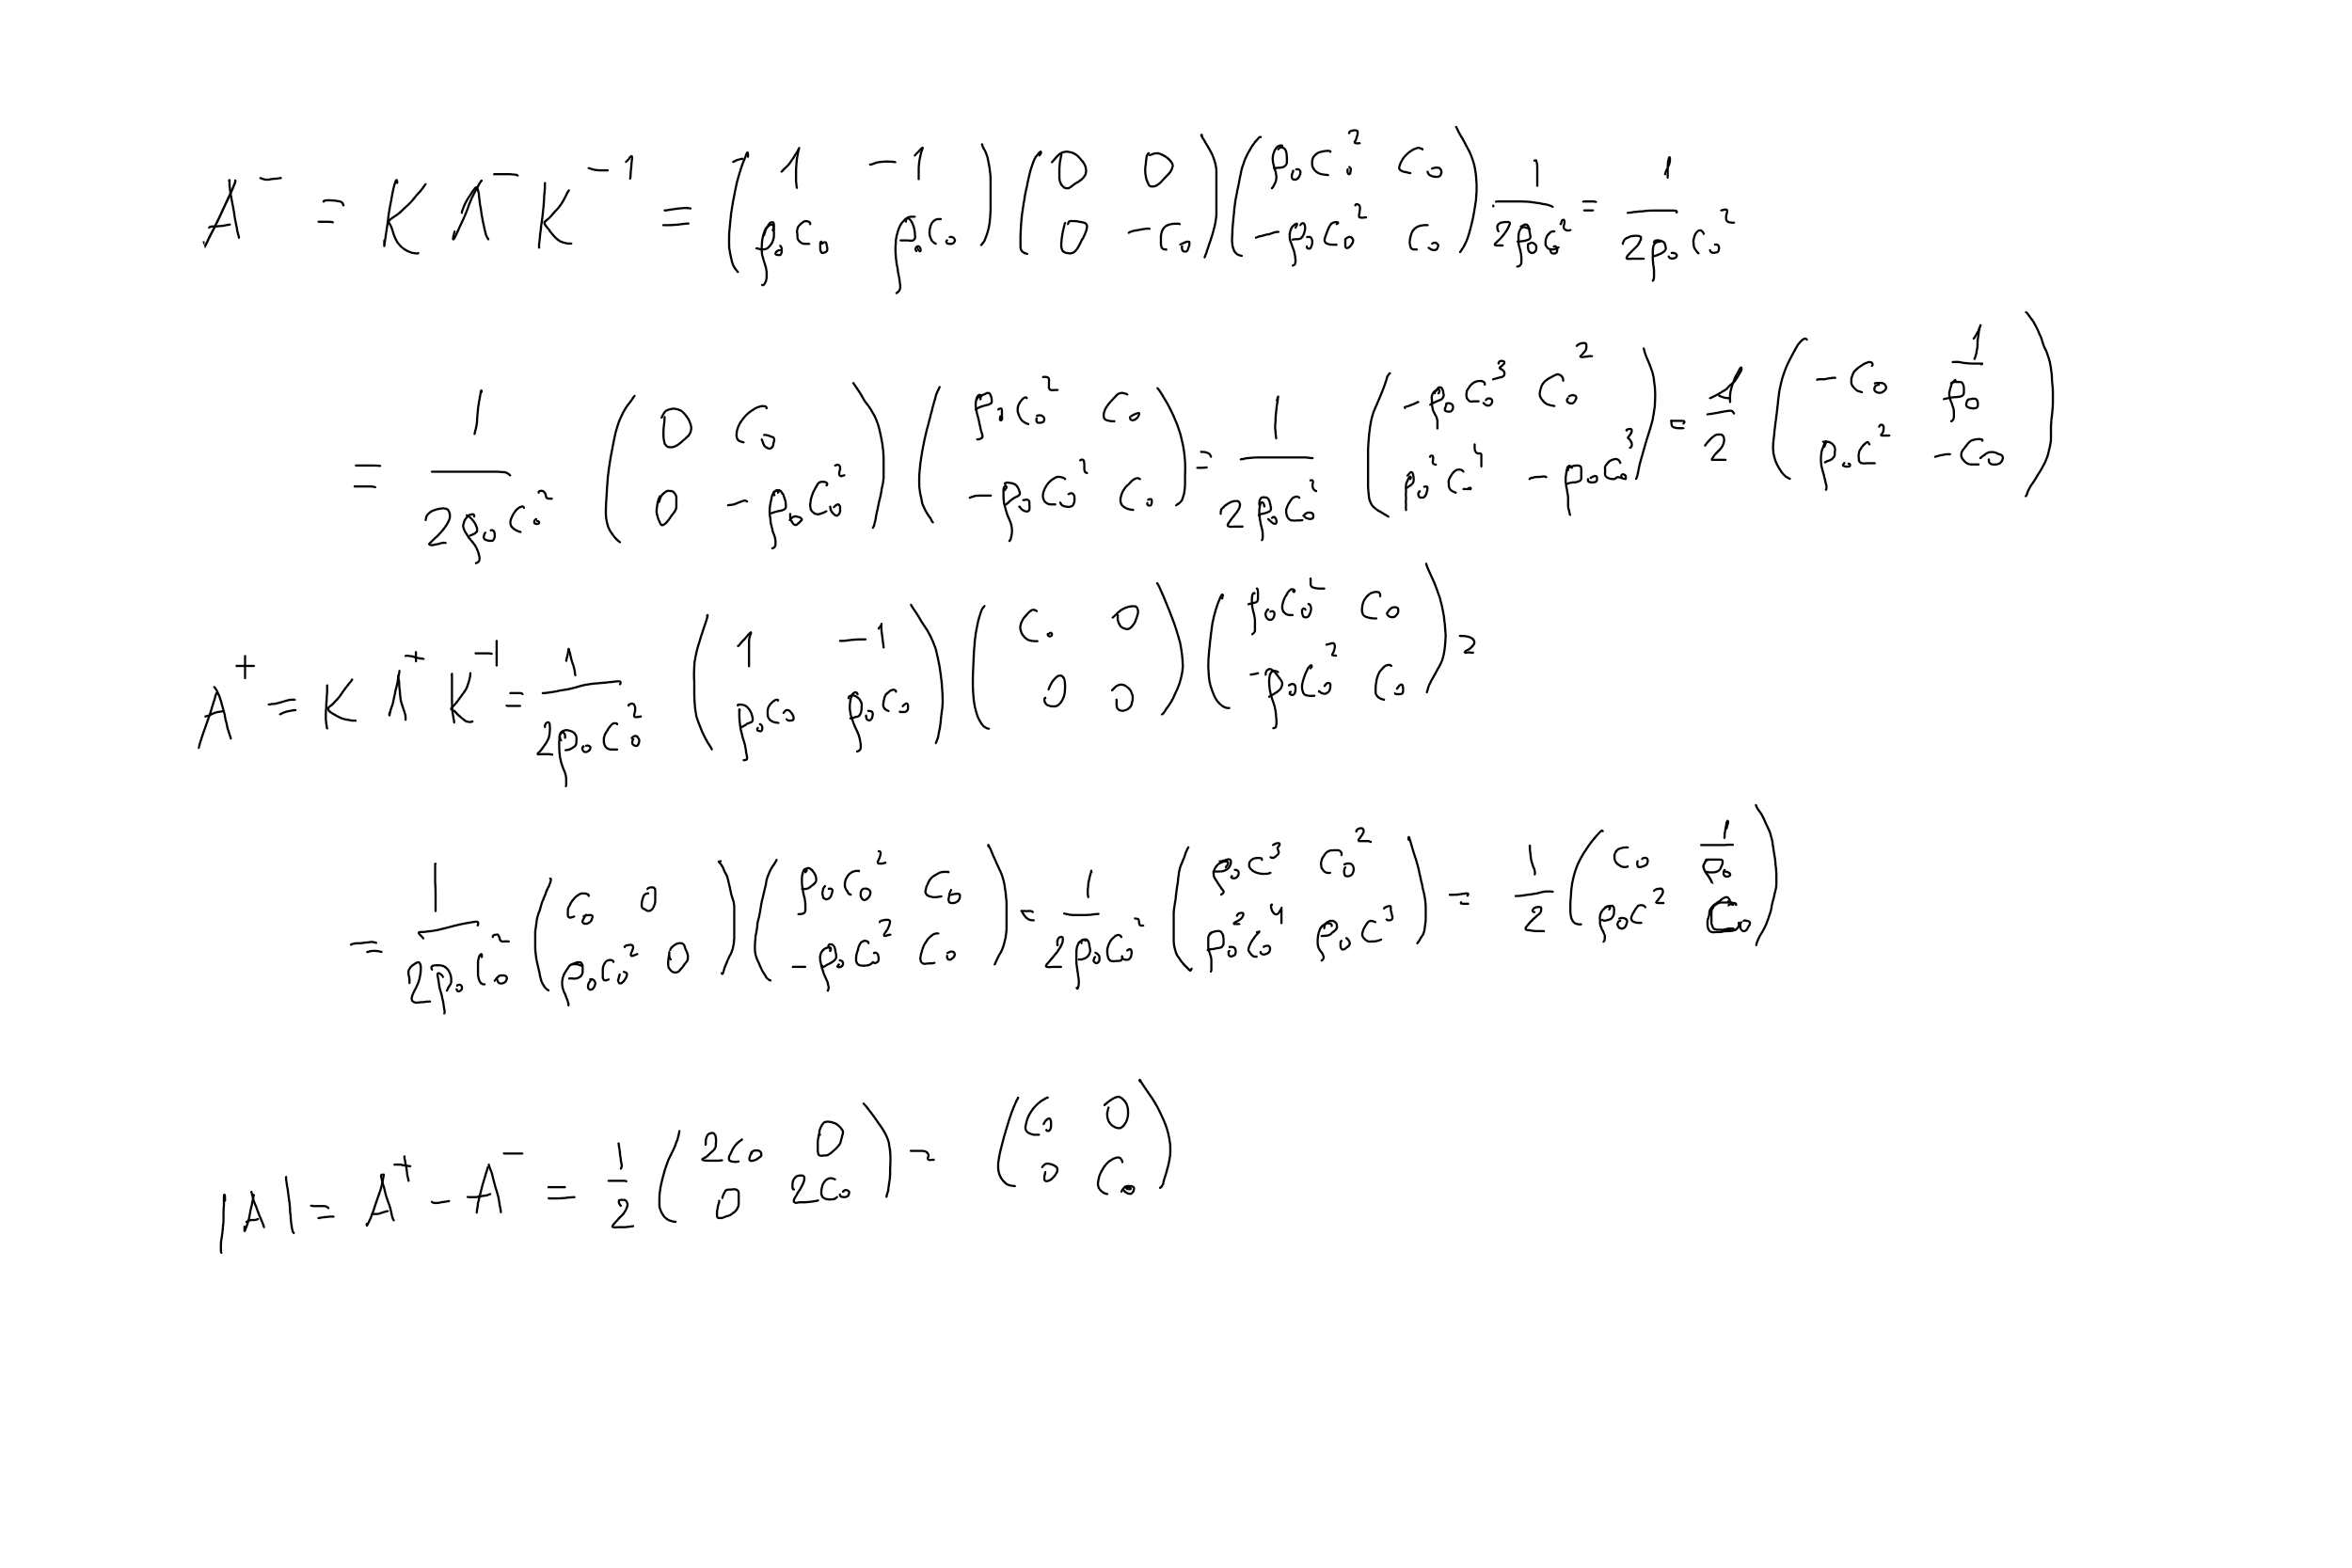

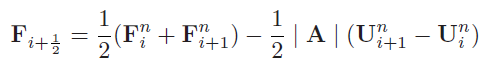

In [16]:
A = np.array([[0,1/rho_0],
              [rho_0*c_0**2,0]])

In [17]:
mod_A = np.array([[c_0,0],[0,c_0]])

In [18]:
nt = 25

In [19]:
u_n = np.zeros((nt,len(u)))
p_n = np.zeros((nt,len(p)))
U_n =np.array([u_n,p_n])

In [20]:
U_n.shape

(2, 25, 81)

In [21]:
U.shape

(2, 81)

In [22]:
def godunov_m(U, nt, dt, dx, rho_0, c_0):
    
    u_n = np.zeros((nt,len(u)))
    p_n = np.zeros((nt,len(p)))
    U_n =np.array([u_n,p_n])
    
    U_n[:,0,:] = U.copy()
    
    
    for t in range(1,nt):
        F = 0.5*(np.dot(A,U[:,:-1])+np.dot(A,U[:,1:])) \
        - 0.5*np.dot(mod_A,U[:,1:]-U[:,:-1])
        
        U_n[:,t,1:-1] = U[:,1:-1] - dt/dx*(F[:,1:] - F[:,:-1])
        
        U_n[:,t,0] = U[:,0]
        U_n[:,t,-1] = U[:,-1]
        
        U = U_n[:,t,:].copy()
        


    return U_n    

In [23]:
U_n = godunov_m(U, nt, dt, h, rho_0, c_0)

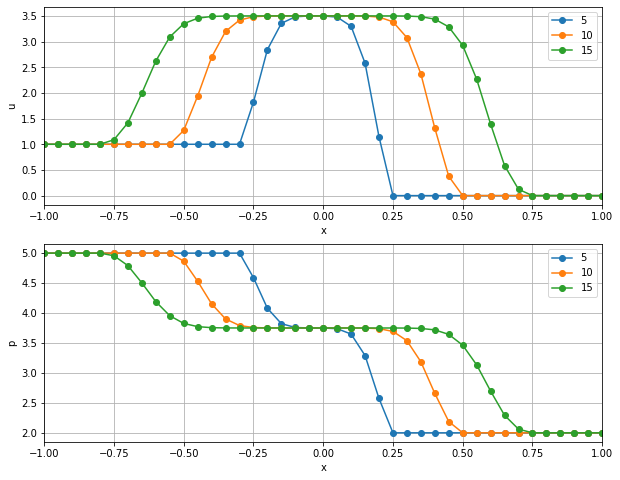

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
for step in (5,10,15):
    axs[0].plot(x,U_n[0,step,:],'-o', label = step)
    axs[1].plot(x,U_n[1,step,:],'-o', label = step)
axs[0].set_ylabel('u')
axs[1].set_ylabel('p')
for ax in axs:
    ax.set_xlim(-1,1)
    ax.set_xlabel('x')
    ax.legend()

    ax.grid(True)

In [25]:
F = 0.5*(np.dot(A,U[:,:-1])+np.dot(A,U[:,1:])) - 0.5*np.dot(mod_A,U[:,1:]-U[:,:-1])

In [26]:
F

array([[20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. ,
        20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. ,
        20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. , 20. ,
        20. , 20. , 20. , 20. , 20. , 20. , 15. ,  8. ,  8. ,  8. ,  8. ,
         8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,
         8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,
         8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,
         8. ,  8. ,  8. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  3.5,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0.

In [27]:
U_,P_ = get_BV(u[:-1],u[1:],p[:-1],p[1])

In [28]:
P_/rho_0

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       21., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14.])